In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

train_samples = 10000

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

def expand(i):
    res = [0 for _ in range(0, 10)]
    res[i] = 1 
    return res

y = [expand(int(v)) for v in y]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import src.FFNN as ffnn
from src.utils import plot_training_results

In [25]:

# Define neural network parameters
layer_size = [784, 128, 128, 64, 10]
activations = ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]

# Create and train the model
model = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="normal", weight_init_args={"seed": 73})
plot = model.fit(X_train, y_train, 500, 0.1, 50, True, X_val, y_val)


Epoch 1/500, Loss: 1.0186, Val_loss: 0.9008
Epoch 2/500, Loss: 0.9000, Val_loss: 0.8997
Epoch 3/500, Loss: 0.8996, Val_loss: 0.8996
Epoch 4/500, Loss: 0.8996, Val_loss: 0.8995
Epoch 5/500, Loss: 0.8995, Val_loss: 0.8994
Epoch 6/500, Loss: 0.8995, Val_loss: 0.8994
Epoch 7/500, Loss: 0.8994, Val_loss: 0.8993
Epoch 8/500, Loss: 0.8993, Val_loss: 0.8992
Epoch 9/500, Loss: 0.8991, Val_loss: 0.8989
Epoch 10/500, Loss: 0.8989, Val_loss: 0.8987
Epoch 11/500, Loss: 0.8985, Val_loss: 0.8982
Epoch 12/500, Loss: 0.8978, Val_loss: 0.8974
Epoch 13/500, Loss: 0.8967, Val_loss: 0.8960
Epoch 14/500, Loss: 0.8948, Val_loss: 0.8935
Epoch 15/500, Loss: 0.8912, Val_loss: 0.8886
Epoch 16/500, Loss: 0.8842, Val_loss: 0.8794
Epoch 17/500, Loss: 0.8714, Val_loss: 0.8630
Epoch 18/500, Loss: 0.8512, Val_loss: 0.8398
Epoch 19/500, Loss: 0.8278, Val_loss: 0.8183
Epoch 20/500, Loss: 0.8097, Val_loss: 0.8036
Epoch 21/500, Loss: 0.7954, Val_loss: 0.7890
Epoch 22/500, Loss: 0.7785, Val_loss: 0.7709
Epoch 23/500, Loss:

In [26]:
y_pred = model.predict(X_test)
for i in range(20):
    print("O:", y_pred[i])
    print("Y:", y_test[i])

# Convert one-hot predictions to labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

O: [1.06968958e-02 1.08199905e-03 2.36297407e-04 1.72764131e-02
 8.76593678e-04 9.79029485e-01 1.44973256e-02 2.18541072e-04
 2.91093530e-02 4.18722343e-03]
Y: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
O: [4.90072594e-03 1.20327161e-02 8.13584430e-03 9.76055640e-01
 4.22466053e-05 7.21985933e-03 2.77312286e-04 1.31136293e-02
 9.29035081e-03 1.34664060e-03]
Y: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
O: [0.00684857 0.00350162 0.00080435 0.00076959 0.10468374 0.00228594
 0.00085804 0.08721692 0.00400216 0.6304074 ]
Y: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
O: [9.84155015e-01 4.48436940e-05 5.99909159e-03 3.71825911e-03
 9.93470443e-04 1.14792423e-02 2.15309514e-02 7.27571715e-03
 8.37021056e-04 1.52252965e-02]
Y: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
O: [1.81036109e-03 1.80056038e-02 7.40004154e-04 3.65199777e-04
 6.52496617e-01 2.50188778e-03 1.06128637e-02 4.55994689e-03
 1.47293348e-02 4.56134069e-01]
Y: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
O: [0.00197495 0.00521531 0.0140537  0.01190401 0.00454943 0.01282311
 0.00108535 0.00

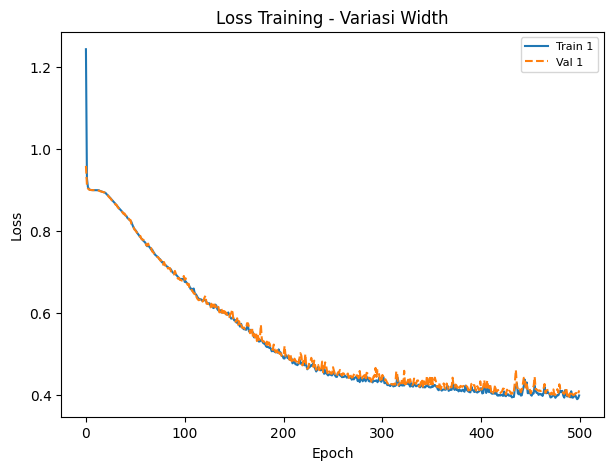

In [ ]:
plot_training_results([plot])